# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number

>🔑 **Note:** Hyperparameter
* Input layer shape: Same shape as number of features(e.g. # bedrooms, # bathrooms, ...)
* Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer: Problem specific, generally 10 to 100
* Output layer shape: Same shape as desired prediction shape
* Hidden activation: Usually ReLU
* Output activation: None, ReLU, tanh
* Loss function: MSE, MAE
* Optimizer: SGD, Adam, ...

In [37]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices("GPU")

2.6.3


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Creating some data to view and to fit

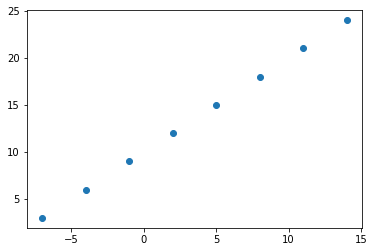

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24])

# Visualize
plt.scatter(X, y)

In [39]:
# This is the relationship our neural network should learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes


In [40]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939_700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [41]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [42]:
X[0].ndim

0

In [43]:
X[0], y[0]

(-7.0, 3.0)

In [44]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how ring it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrix (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)]) # This way we're adding Layers like in a list. We can also use `model.add`

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 148ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [47]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [48]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we tool to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might chagen the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [49]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 144ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [50]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[29.739855]], dtype=float32))

In [51]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 181ms/step - loss: 11.7683 - mae: 11.7683
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0964 - mae: 11.0964
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7211 - mae: 9.7211
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0105 - mae: 9.0105
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2779 - mae: 8.2779
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5200 - mae: 7.5200
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0674 - mae: 7.0674
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss:

In [52]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[26.587622]], dtype=float32))

## Evaluating a model

In practive, a typical workflow you'll go through when build neural networks is:
`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...`

When it comes to evalution... ther are 3 words you should memorize:
>`Visualize, visualize, visualize:`

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [54]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [56]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

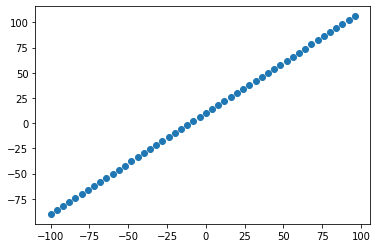

In [58]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [60]:
# Check the length of how many samples we have
len(X)

50

In [63]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # 20% of the data
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

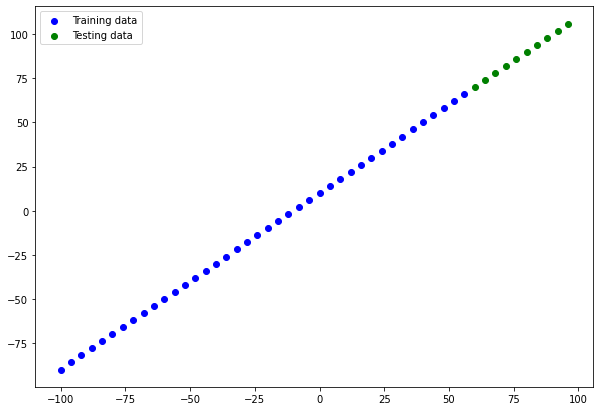

In [64]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="green", label="Testing data")
# show legend
plt.legend()

In [65]:
# Let's have a look at how to build a neural network four our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the mdoel
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 10.5273 - mae: 10.5273
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3906 - mae: 9.3906
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6292 - mae: 7.6292
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6859 - mae: 9.6859
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0740 - mae: 11.0740
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2264 - mae: 10.2264
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2347 - mae: 9.2347
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1547 - mae: 9.1547
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7875 - mae: 11.7875
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7172 - mae: 13.7172
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - lo

### Visualizing the model

In [66]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
    ])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned parameters from other models during **transfer learning**)

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.



In [73]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)
# Every time i fit the model without reinstantiating it, it updates the actual training model.

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8429 - mae: 12.8429
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 7.7871 - mae: 7.7871
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9179 - mae: 9.9179
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5446 - mae: 8.5446
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 7.5981 - mae: 7.5981
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 6.9227 - mae: 6.9227
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 4.0363 - mae: 4.0363
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 5.6187 - mae: 5.6187
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.0543 - mae: 18.0543
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 6.5911 - mae: 6.5911
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 5.